# 数据预处理

## 导入数据

In [1]:
import pandas as pd #导入Pandas
df_sales = pd.read_csv('易速鲜花订单记录.csv') #载入数据
df_sales.head() #显示头几行数据 

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市
0,536374,21258,6/1/2020 9:09,五彩玫瑰五支装,32,10.95,15100,北京
1,536376,22114,6/1/2020 9:32,茉莉花白色25枝,48,3.45,15291,上海
2,536376,21733,6/1/2020 9:32,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海
3,536378,22386,6/1/2020 9:37,百合粉色10花苞,10,1.95,14688,北京
4,536378,85099C,6/1/2020 9:37,橙黄香槟色康乃馨,10,1.95,14688,北京


## 整理日期格式

In [2]:
df_sales = pd.read_csv('易速鲜花订单记录.csv') #载入数据
print('日期范围（格式转化前）: %s ~ %s' % (df_sales['消费日期'].min(), df_sales['消费日期'].max())) #显示日期范围（格式转换前）
df_sales['消费日期'] = pd.to_datetime(df_sales['消费日期']) #转换日期格式
print('日期范围（格式转化后）: %s ~ %s' % (df_sales['消费日期'].min(), df_sales['消费日期'].max()))#显示日期范围

日期范围（格式转化前）: 1/1/2021 10:11 ~ 9/9/2020 9:20
日期范围（格式转化后）: 2020-06-01 09:09:00 ~ 2021-06-09 12:31:00


In [3]:
df_sales = df_sales.loc[df_sales['消费日期'] < '2021-06-01'] #只保留整月数据
print('日期范围（删除不完整的月份）: %s ~ %s' % (df_sales['消费日期'].min(), df_sales['消费日期'].max())) #显示日期范围

日期范围（删除不完整的月份）: 2020-06-01 09:09:00 ~ 2021-05-31 17:39:00


## 数据可视化

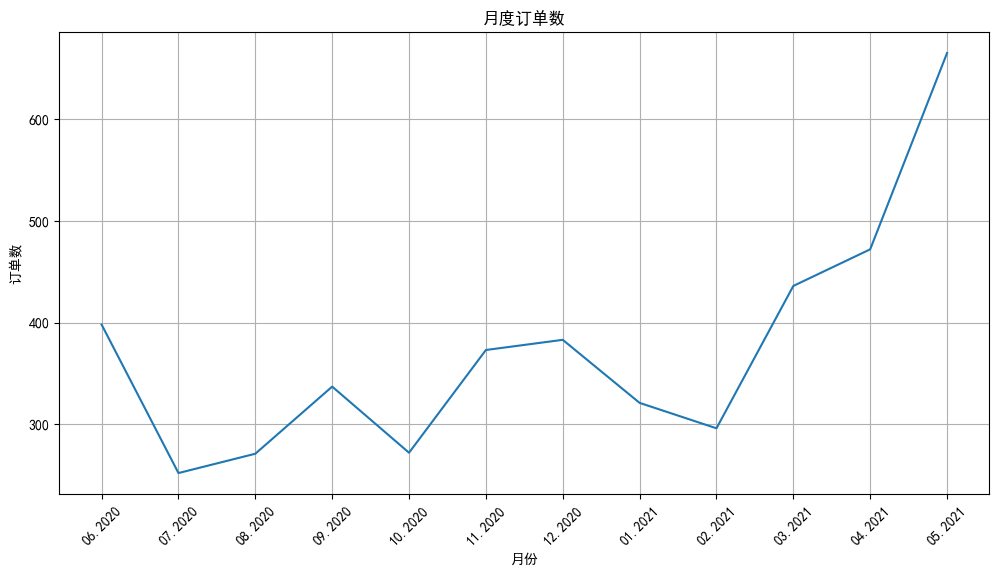

In [4]:
import matplotlib.pyplot as plt #导入Matplotlib的pyplot模块
plt.rcParams['font.family'] = ['SimHei'] #或者 ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
#构建月度的订单数的DataFrame
df_orders_monthly = df_sales.set_index('消费日期')['订单号'].resample('M').nunique()
#设定绘图的画布
ax = pd.DataFrame(df_orders_monthly.values).plot(grid=True,figsize=(12,6),legend=False)
ax.set_xlabel('月份') # X轴label
ax.set_ylabel('订单数') # Y轴Label
ax.set_title('月度订单数') # 图题
#设定X轴月份显示格式
plt.xticks(
    range(len(df_orders_monthly.index)), 
    [x.strftime('%m.%Y') for x in df_orders_monthly.index], 
    rotation=45)
plt.show() # 绘图

## 数据清洗

In [5]:
df_sales = df_sales.drop_duplicates() #删除重复的数据行

## 特征工程

In [6]:
df_sales['总价'] = df_sales['数量'] * df_sales['单价'] #计算每单的总价
df_sales.head() #显示头几行数据  

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市,总价
0,536374,21258,2020-06-01 09:09:00,五彩玫瑰五支装,32,10.95,15100,北京,350.4
1,536376,22114,2020-06-01 09:32:00,茉莉花白色25枝,48,3.45,15291,上海,165.6
2,536376,21733,2020-06-01 09:32:00,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海,163.2
3,536378,22386,2020-06-01 09:37:00,百合粉色10花苞,10,1.95,14688,北京,19.5
4,536378,85099C,2020-06-01 09:37:00,橙黄香槟色康乃馨,10,1.95,14688,北京,19.5


### 构建User用户表

In [7]:
df_sales_3m = df_sales[(df_sales.消费日期 > '2020-06-01') & (df_sales.消费日期 <= '2020-08-30')] #构建仅含头三个月数据的数据集
df_sales_3m.reset_index(drop=True) #重置索引

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市,总价
0,536374,21258,2020-06-01 09:09:00,五彩玫瑰五支装,32,10.95,15100,北京,350.40
1,536376,22114,2020-06-01 09:32:00,茉莉花白色25枝,48,3.45,15291,上海,165.60
2,536376,21733,2020-06-01 09:32:00,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海,163.20
3,536378,22386,2020-06-01 09:37:00,百合粉色10花苞,10,1.95,14688,北京,19.50
4,536378,85099C,2020-06-01 09:37:00,橙黄香槟色康乃馨,10,1.95,14688,北京,19.50
...,...,...,...,...,...,...,...,...,...
14564,545190,22937,2020-08-29 15:32:00,产品说明掩码,6,18.00,15656,苏州,108.00
14565,545190,22722,2020-08-29 15:32:00,产品说明掩码,4,39.50,15656,苏州,158.00
14566,545190,22457,2020-08-29 15:32:00,产品说明掩码,60,3.00,15656,苏州,180.00
14567,545190,22464,2020-08-29 15:32:00,产品说明掩码,12,25.00,15656,苏州,300.00


In [8]:
df_user = pd.DataFrame(df_sales['用户码'].unique()) #生成以用户码为主键的结构
df_user.columns = ['用户码'] #设定字段名
df_user.head() #显示头几行数据
df_R_value = df_sales_3m.groupby('用户码').消费日期.max().reset_index() #找到每个用户的最近消费日期，构建df_R_value对象
df_R_value.columns = ['用户码','最近购买日期'] #设定字段名
df_R_value['R值'] = (df_R_value['最近购买日期'].max() - df_R_value['最近购买日期']).dt.days #计算最新日期与上次消费日期的天数
df_user = pd.merge(df_user, df_R_value[['用户码','R值']], on='用户码') #把上次消费距最新日期的天数（R值）合并至df_user结构
df_F_value = df_sales_3m.groupby('用户码').消费日期.count().reset_index() #计算每个用户消费次数，构建df_F_value对象
df_F_value.columns = ['用户码','F值'] #设定字段名
df_user = pd.merge(df_user, df_F_value[['用户码','F值']], on='用户码') #把消费频率(F值)整合至df_user结构
df_M_value = df_sales_3m.groupby('用户码').总价.sum().reset_index() #计算每个用户三个月消费总额，构建df_M_value对象
df_M_value.columns = ['用户码','M值'] #设定字段名
df_user = pd.merge(df_user, df_M_value, on='用户码') #把消费总额整合至df_user结构
df_user #显示用户表结构

,用户码,R值,F值,M值
0,15100,45,6,635.10
1,15291,35,35,1329.95
2,14688,6,85,1472.28
3,15311,5,715,12711.66
4,15862,89,64,354.23
...,...,...,...,...
365,15951,1,22,375.17
366,14745,1,7,240.60
367,15724,0,5,103.65
368,15874,0,5,584.35


## 构建标签

In [9]:
df_user_1y = df_sales.groupby('用户码')['总价'].sum().reset_index() #计算每个用户整年消费总额，构建df_user_1y对象
df_user_1y.columns = ['用户码','年度LTV'] #设定字段名
df_user_1y.head() #显示头几行数据
df_LTV = pd.merge(df_user, df_user_1y, on='用户码', how='left') #构建整体LTV训练数据集
df_LTV #显示df_LTV

,用户码,R值,F值,M值,年度LTV
0,15100,45,6,635.10,635.10
1,15291,35,35,1329.95,4596.51
2,14688,6,85,1472.28,4449.48
3,15311,5,715,12711.66,58218.04
4,15862,89,64,354.23,659.73
...,...,...,...,...,...
365,15951,1,22,375.17,375.17
366,14745,1,7,240.60,1167.16
367,15724,0,5,103.65,212.30
368,15874,0,5,584.35,4330.67


## 创建特征集和标签集

In [10]:
X = df_LTV.drop(['用户码','年度LTV'],axis=1) #特征集
X.head() #显示特征集

,R值,F值,M值
0,45,6,635.10
1,35,35,1329.95
2,6,85,1472.28
3,5,715,12711.66
4,89,64,354.23


In [11]:
y = df_LTV['年度LTV'] #标签集
y.head() #显示标签集

0      635.10
1     4596.51
2     4449.48
3    58218.04
4      659.73
Name: 年度LTV, dtype: float64

## 拆分训练集、验证集和测试集

In [12]:
from sklearn.model_selection import train_test_split

# 拆分成训练集和测试集 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# 训练模型

In [13]:
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor()

## 网格搜索

In [14]:
# 对随机森林算法进行参数优化
rfr_param_grid = {'bootstrap': [True, False],
                 'max_depth': [10, 50, 100, None],
                 'max_features': ['auto', 'sqrt'],
                 'min_samples_leaf': [1, 2, 4],
                 'min_samples_split': [2, 5, 10],
                 'n_estimators': [50, 500, 2000]}

这段代码定义了一个随机森林（Random Forest）分类器的参数空间，以进行参数优化和模型拟合。各参数意义如下：

1. `bootstrap`: 布尔值，指定每棵树构建时采样训练数据的方式。若为`True`，则在构建单棵树时将随机有放回地抽取一定数量的样本。若为`False`，将不进行放回抽样，直接采用整个训练集训练每棵树。

2. `max_depth`: 整数或`None`，表示树的最大深度。较小的深度可降低模型复杂度，避免过拟合；较大的深度可能导致更好的性能但增加了过拟合风险。设为`None`时，表示无最大深度限制，树可能会分至叶节点。

3. `max_features`: 字符串，指定每次分裂时考虑的特征数量。可以为`auto`, `sqrt`。若设为`auto`，将考虑全部特征；若设为`sqrt`，则在每次分裂时只考虑总特征数量平方根个特征。

4. `min_samples_leaf`: 整数，表示叶节点需要含有的最少样本数。增加此限制可防止过拟合。

5. `min_samples_split`: 整数，表示内部节点需要含有的最少样本数，以进行后续分裂。增加此限制会降低整体树的深度。

6. `n_estimators`: 整数，指定随机森林中树的数量。较多的树可以提高模型的稳定性，但也会增加计算成本。

设置这些参数后，您可以使用如`GridSearchCV`或`RandomizedSearchCV`等参数优化方法来自动搜索最佳参数，提升模型性能。当然，这将花费较长时间，但可避免手动调参的问题。搜索到最佳参数组合后，将其应用于拟合的模型，以期在未知数据上取得更好的泛化性能。

In [15]:
from sklearn.model_selection import GridSearchCV # 导入网格搜索工具
model_rfr_gs = GridSearchCV(model_rfr,
                            param_grid = rfr_param_grid, cv=3,
                            scoring="r2", n_jobs= 10, verbose = 1)
model_rfr_gs.fit(X_train, y_train) # 用优化后的参数拟合训练数据集

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\Abraham Cheng\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=10,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 50, 100, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 500, 2000]},
             scoring='r2', verbose=1)

In [16]:
print(" 最佳参数组合:", model_rfr_gs.best_params_)

 最佳参数组合: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [17]:
from sklearn.metrics import r2_score,   median_absolute_error #导入Sklearn评估模块
print('训练集上的R平方分数-调参后的随机森林: %0.4f' % r2_score(y_train, model_rfr_gs.predict(X_train)))
print('测试集上的R平方分数-调参后的随机森林: %0.4f' % r2_score(y_test, model_rfr_gs.predict(X_test)))

训练集上的R平方分数-调参后的随机森林: 0.8615
测试集上的R平方分数-调参后的随机森林: -0.1627


这段代码展示了如何使用`r2_score`（R² 得分）评估优化后随机森林模型（`model_rfr_gs`）在训练集（`X_train`、`y_train`）和测试集（`X_test` 、`y_test`）上的表现。同时，导入了`median_absolute_error`，虽未在本例中使用，但它是另一种常用的回归模型评估指标。

首先，从Scikit-learn的评估模块`sklearn.metrics`导入`r2_score` 和 `median_absolute_error`评估指标。

然后，使用`model_rfr_gs.predict(X_train)`和`model_rfr_gs.predict(X_test)`分别对训练集和测试集进行预测。预测结果与实际目标值（`y_train` 和 `y_test`）一起传入`r2_score`函数以计算R² 得分。

最后，通过`print`语句分别输出优化后随机森林模型在训练集和测试集上的R² 得分。这些分数可以帮助您了解模型对数据拟合和泛化能力的优劣。通常情况下，训练分数较高，而测试分数较低，两者之差比较小则表示泛化性能较好。

从输出结果来看，优化后的随机森林模型在训练集上的 R²（R平方分数）较高（0.8663），说明模型在训练数据上的拟合效果较好。但在测试集上的 R² 得分为负数（-0.0896），这意味着模型在测试数据上的表现非常差。


从输出结果来看，优化后的随机森林模型在训练集上的 R²（R平方分数）较高（0.8663），说明模型在训练数据上的拟合效果较好。但在测试集上的 R² 得分为负数（-0.0896），这意味着模型在测试数据上的表现非常差。

R² 得分的计算方法是 1 减去残差平方和除以总平方和。因此，其理论范围介于 -∞ 和 1 之间。一个 R² 得分为负数意味着模型的预测效果比直接使用测试集的均值（即简单的基线模型）还要差，这是一个严重的问题。

有很多可能导致这个问题出现的原因，比如：

1. 模型过拟合：模型在训练集上表现很好，但在测试集上泛化性能非常差。可能需要进一步优化超参数、减小模型复杂度、降低特征数量等，以改善模型泛化能力。

2. 数据不平衡：训练集和测试集可能存在数据分布不一致的情况，这可能会导致模型在测试集上的表现较差。尝试对数据进行重新采样、调整类别权重、增加数据集大小或使用更鲁棒的模型等方法，以解决该问题。

3. 特征选择：可能当前选用的特征对预测目标不是很有效，可以尝试通过特征筛选、特征工程或特征变换等方法，以提高特征对目标的预测能力。

建议进一步检查数据和模型，尝试分析并解决上述可能导致负 R² 得分的原因。在调整模型参数、特征选择等方面进行优化，以提高模型在测试集上的泛化性能。